In [85]:
import PIL
from PIL import Image
import glob
import numpy as np
import cv2
import os
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.preprocessing.image import ImageDataGenerator
from PyQt5.QtWidgets import QApplication, QMainWindow, QLabel, QPushButton, QVBoxLayout, QWidget, QFileDialog

#print("Pillow Version: ", PIL.__version__)


In [58]:
#Rotation Function
def rot90(a):
    rot = []

    for i in range(210):

        rot.append(cv2.rotate(a[i], cv2.ROTATE_90_CLOCKWISE))
       

    rot = np.array(rot)

  

    combined = np.concatenate((a,rot))

    return combined

In [59]:
folder_path = "/Users/danieljones/OneDrive/Fourth_Year/EEE4114F/DanielSymbol2Spice/Training_Data/Resized_Data/New_Batteries"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

batteries_array = np.array(images)/255

batteries_array_combined = rot90(batteries_array)








In [60]:
folder_path = "/Users/danieljones/OneDrive/Fourth_Year/EEE4114F/DanielSymbol2Spice/Training_Data/Resized_Data/Resistors"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

resistors_array = np.array(images)/255

resistors_array_combined = rot90(resistors_array)

In [61]:
folder_path = "/Users/danieljones/OneDrive/Fourth_Year/EEE4114F/DanielSymbol2Spice/Training_Data/Resized_Data/Capacitors"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

capacitors_array = np.array(images)/255

capacitors_array_combined = rot90(capacitors_array)

In [62]:
folder_path = "/Users/danieljones/OneDrive/Fourth_Year/EEE4114F/DanielSymbol2Spice/Training_Data/Resized_Data/Inductors"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

inductors_array = np.array(images)/255

inductors_array_combined = rot90(inductors_array)

In [63]:
folder_path = "/Users/danieljones/OneDrive/Fourth_Year/EEE4114F/DanielSymbol2Spice/Training_Data/Resized_Data/Ground"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

ground_array = np.array(images)/255

ground_array_combined = rot90(ground_array)

In [64]:
folder_path = "/Users/danieljones/OneDrive/Fourth_Year/EEE4114F/DanielSymbol2Spice/MishayTrisData/Resized"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

images = np.array(images)/255

In [65]:
#print(np.shape(ground_array))
labels = ['Ground', 'Resistor', 'Inductor', 'Capacitor', 'Battery']


In [66]:
ground_label = np.zeros(420)
resistor_label = np.ones(420)
inductor_label = 2*np.ones(420)
capacitor_label = 3*np.ones(420)
battery_label = 4*np.ones(420)

print(battery_label[0])

4.0


In [67]:
ground_array = list(zip(ground_array_combined,ground_label))
resistors_array = list(zip(resistors_array_combined, resistor_label))
inductors_array = list(zip(inductors_array_combined, inductor_label))
capacitor_array = list(zip(capacitors_array_combined, capacitor_label))
batteries_array = list(zip(batteries_array_combined, battery_label))



In [68]:
data_with_labels = np.concatenate((ground_array,resistors_array,inductors_array,capacitor_array,batteries_array))
print(np.shape(data_with_labels))

(2100, 2)


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [69]:
#random.shuffle(data_with_labels)

In [70]:
shuffled_data, shuffled_labels = zip(*data_with_labels)

In [71]:
print(np.shape(shuffled_data))
train_data,test_data,train_labels,test_labels = train_test_split(shuffled_data, shuffled_labels, test_size = 0.2)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.1)



(2100, 56, 56)


In [72]:
def plot_sample(X,y,index,Labels):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(Labels[int(y[index])])
    

In [73]:
fox = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape=(56,56,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 4, kernel_size = (3,3), activation = 'relu', input_shape=(56,56,1)),
    layers.MaxPooling2D((2,2)),



    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')


])

In [74]:
fox.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [75]:
train_data = np.asarray(train_data)
train_labels = np.asarray(train_labels)

fox.fit(train_data,train_labels,epochs = 25)

Epoch 1/25
48/48 [==============================] - 4s 59ms/step - loss: 1.5924 - accuracy: 0.2401
Epoch 2/25
48/48 [==============================] - 3s 66ms/step - loss: 1.2533 - accuracy: 0.5251
Epoch 3/25
48/48 [==============================] - 3s 54ms/step - loss: 1.0006 - accuracy: 0.6356
Epoch 4/25
48/48 [==============================] - 3s 64ms/step - loss: 0.8886 - accuracy: 0.6759
Epoch 5/25
48/48 [==============================] - 3s 69ms/step - loss: 0.8298 - accuracy: 0.7024
Epoch 6/25
48/48 [==============================] - 3s 54ms/step - loss: 0.7635 - accuracy: 0.7136
Epoch 7/25
48/48 [==============================] - 3s 57ms/step - loss: 0.7135 - accuracy: 0.7401
Epoch 8/25
48/48 [==============================] - 3s 60ms/step - loss: 0.6380 - accuracy: 0.7718
Epoch 9/25
48/48 [==============================] - 3s 58ms/step - loss: 0.5998 - accuracy: 0.7956
Epoch 10/25
48/48 [==============================] - 3s 57ms/step - loss: 0.5317 - accuracy: 0.8075
Epoch 11/

In [76]:
fox.evaluate(train_data,train_labels)

48/48 [==============================] - 1s 14ms/step - loss: 0.1218 - accuracy: 0.9676


[0.12183186411857605, 0.9675925970077515]

In [77]:
val_data = np.asarray(val_data)
val_labels = np.asarray(val_labels)
fox.evaluate(val_data,val_labels)

6/6 [==============================] - 0s 13ms/step - loss: 0.4253 - accuracy: 0.8810


[0.42526841163635254, 0.8809523582458496]

In [78]:
test_data = np.asarray(test_data)
test_labels = np.asarray(test_labels)
fox.evaluate(test_data, test_labels)

14/14 [==============================] - 0s 13ms/step - loss: 0.2950 - accuracy: 0.8976


[0.2950116693973541, 0.8976190686225891]

In [79]:
#fox.save('ModelGUIV1')

In [80]:
#testing model

loaded_model = models.load_model('ModelGUIV1')

predictions = loaded_model.predict(images)

print(predictions[0])



1/1 [==============================] - 0s 96ms/step
[4.0076743e-03 2.5977558e-04 9.9149996e-01 2.1730911e-03 2.0595242e-03]


In [81]:
#print(predictions)

In [82]:
est_y = np.zeros(len(images))
for i in range(len(images)):

    est_y[i] = np.argmax(predictions[i])


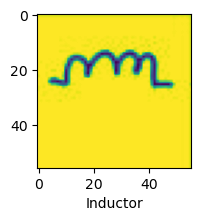

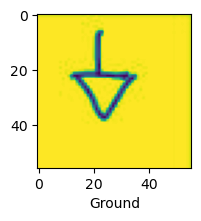

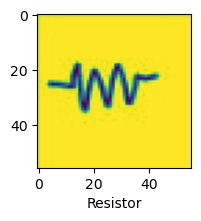

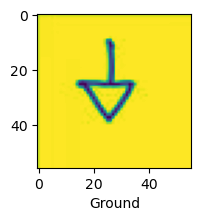

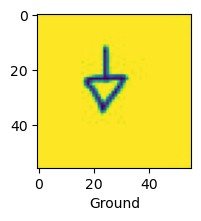

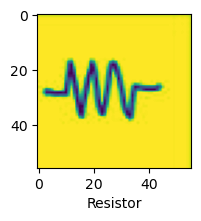

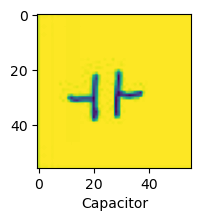

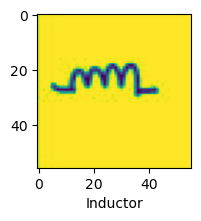

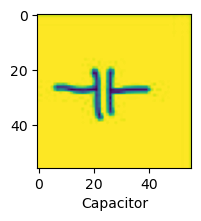

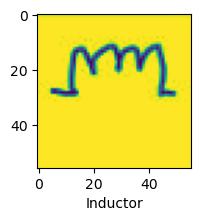

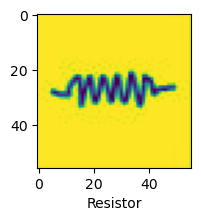

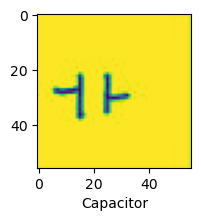

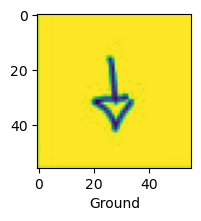

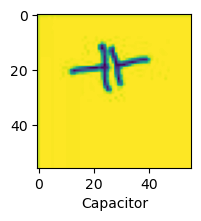

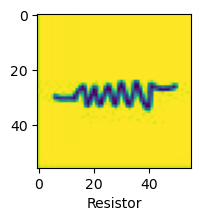

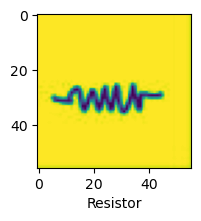

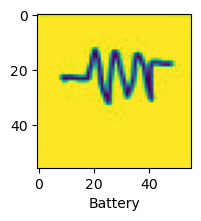

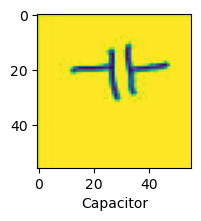

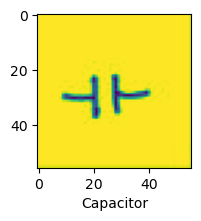

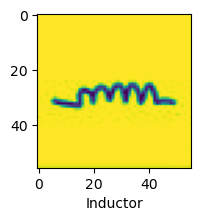

In [83]:
for i in range(len(images)):

    plot_sample(images,est_y,i,labels)